# McDonald's Menu Nutrition Facts

## Dataset Overview
This dataset contains a detailed nutritional analysis of every item on the US McDonald's menu, covering a variety of products such as breakfast items, burgers, chicken and fish sandwiches, fries, salads, beverages (soda, coffee, tea), milkshakes, and desserts.

## Context
Ray Kroc envisioned a restaurant system that would deliver high-quality, consistent food worldwide. Through collaboration with franchisees and suppliers, McDonald's standardized its menu offerings, resulting in iconic items like the Big Mac and Egg McMuffin. This dataset reflects the nutritional composition of these standardized menu items.

## Content
Each menu item in this dataset is categorized with its nutritional values, including calorie content, protein, fats, carbohydrates, and more, providing insight into the nutritional profile of McDonald's offerings.

## Acknowledgements
The nutritional data was collected directly from the McDonald's official website.

## Potential Uses
- Analyzing average calorie content in value meals.
- Evaluating the caloric impact of beverages on daily intake.
- Comparing nutritional benefits between grilled and crispy chicken options.
- Exploring the nutritional trade-offs of egg whites versus whole eggs.
- Determining the minimum combination of items required to meet daily nutritional needs.

In [17]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = kagglehub.dataset_download("mcdonalds/nutrition-facts")

In [6]:
df = pd.read_csv(f"{path}/menu.csv", low_memory=False)

In [7]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

<Figure size 1000x1000 with 0 Axes>

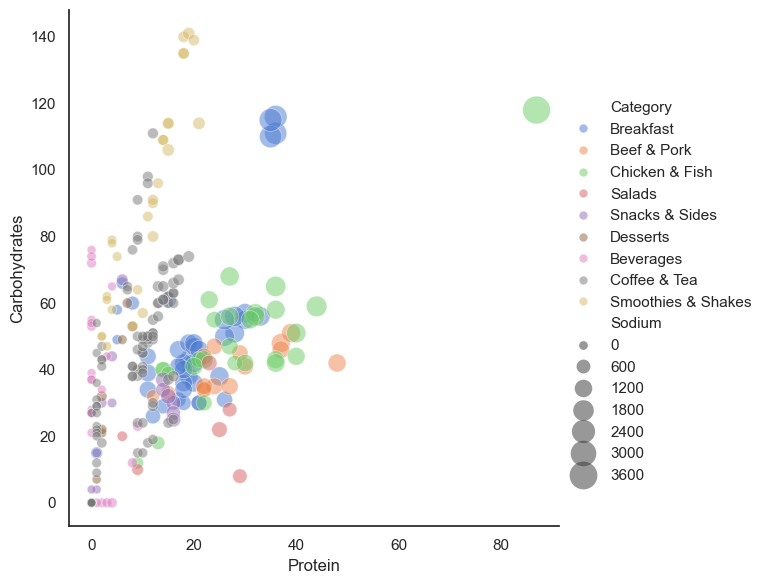

In [98]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="white")

sns.relplot(y="Carbohydrates", x="Protein", hue="Category", alpha=.5,
            size="Sodium", sizes=(40, 400),
            palette="muted", height=6, data=df)

In [129]:
df['Protein_Carb_Ratio'] = df['Protein'] / df['Carbohydrates']

In [130]:
top_products = df.nlargest(5, "Protein_to_Carb_Ratio")

<Axes: xlabel='Protein', ylabel='Carbohydrates'>

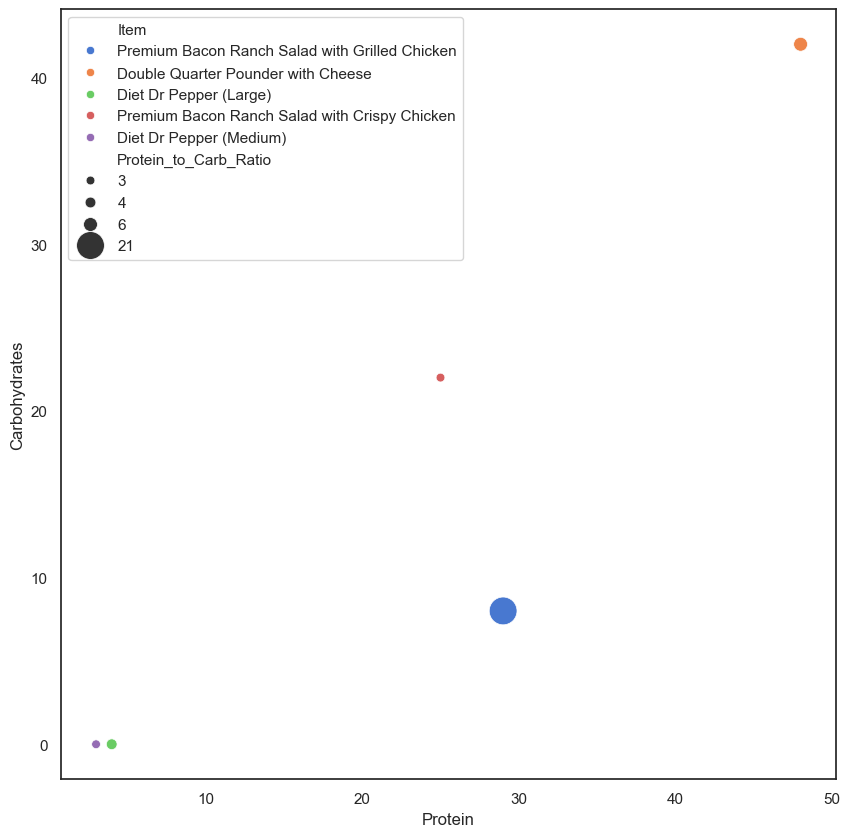

In [131]:
plt.figure(figsize=(10, 10))
sns.scatterplot(top_products, x="Protein", y="Carbohydrates",
                hue="Item", palette="muted",
                sizes=(40, 400), size="Protein_to_Carb_Ratio")